In [1]:
# Source: smogon.com
# Source: https://bulbapedia.bulbagarden.net/wiki/Main_Page
# pokemon_dataset.csv curated by Sagar Kishore (https://github.com/SagarKishore-PFM)

import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

dataset = pd.read_csv('.\pokemon_dataset.csv')
dataset.head()

,Pokemon,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Def,Speed,Adaptability,...,Will-O-Wisp,Wing Attack,Wish,Wood Hammer,Wring Out,X-Scissor,Yawn,Zen Headbutt,Zing Zap,Formats
0,Abomasnow,Grass,Ice,90,92,75,92,85,60,0,...,0,0,0,1,0,0,0,0,0,PU
1,Mega-Abomasnow,Grass,Ice,90,132,105,132,105,30,0,...,0,0,0,1,0,0,0,0,0,NUBL
2,Abra,Psychic,Null,25,20,15,105,55,90,0,...,0,0,0,0,0,0,0,1,0,LC
3,Absol,Dark,Null,65,130,60,75,60,75,0,...,1,0,1,0,0,1,0,1,0,PU
4,Mega-Absol,Dark,Null,65,150,60,115,60,115,0,...,1,0,1,0,0,1,0,1,0,RUBL


In [2]:
X = dataset.iloc[0:, 1:-1].values
X

array([['Grass', 'Ice', 90, ..., 0, 0, 0],
       ['Grass', 'Ice', 90, ..., 0, 0, 0],
       ['Psychic', 'Null', 25, ..., 0, 1, 0],
       ...,
       ['Dragon', 'Ground', 108, ..., 0, 1, 0],
       ['Dragon', 'Ground', 54, ..., 0, 1, 0],
       ['Dragon', 'Ground', 216, ..., 0, 1, 0]], dtype=object)

In [3]:
from sklearn.preprocessing import StandardScaler

X
labelencoder_X_types = LabelEncoder()
labelencoder_X_types.fit(X[:, 1])
X[:, 0] = labelencoder_X_types.transform(X[:, 0])
X[:, 1] = labelencoder_X_types.transform(X[:, 1])

onehotencoder = OneHotEncoder(categorical_features='all')
onehotencoder.fit(X[:, 1:2])
X2 = onehotencoder.transform(X[:, 1:2]).toarray()
X1 = onehotencoder.transform(X[:, 0:1]).toarray()
X12 = np.concatenate((X1, X2), axis=1)

ss = StandardScaler()
X[:, 2:8] = ss.fit_transform(X[:, 2:8])

X_rest = X[:, 2:]
X_final = np.concatenate((X12, X_rest), axis=1)
X_final

C:\Anaconda3\envs\PokeSOM\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.0, 0.0, 0.0, ..., 0, 0, 0],
       [0.0, 0.0, 0.0, ..., 0, 0, 0],
       [0.0, 0.0, 0.0, ..., 0, 1, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 0, 1, 0],
       [0.0, 0.0, 1.0, ..., 0, 1, 0],
       [0.0, 0.0, 1.0, ..., 0, 1, 0]], dtype=object)

In [4]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import seaborn as sns

hue_order_list = ['AG', 'Uber', 'OU', 'UUBL', 'UU', 'RUBL', 'RU', 'NUBL', 'NU', 'PUBL', 'PU', 'NFE', 'Limbo', 'LC']

svd = TruncatedSVD(n_components=200, random_state=324, n_iter=100)
svd.fit(X_final)

X_svd = svd.transform(X_final)
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_svd)
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=500)
X_tsne = tsne.fit_transform(X_pca)

X_tsne_post_svd = tsne.fit_transform(X_svd)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 952 samples in 0.002s...
[t-SNE] Computed neighbors for 952 samples in 0.074s...
[t-SNE] Computed conditional probabilities for sample 952 / 952
[t-SNE] Mean sigma: 0.799727
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.824471
[t-SNE] Error after 500 iterations: 0.921153
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 952 samples in 0.004s...
[t-SNE] Computed neighbors for 952 samples in 0.230s...
[t-SNE] Computed conditional probabilities for sample 952 / 952
[t-SNE] Mean sigma: 1.297749
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.312637
[t-SNE] Error after 500 iterations: 0.870448


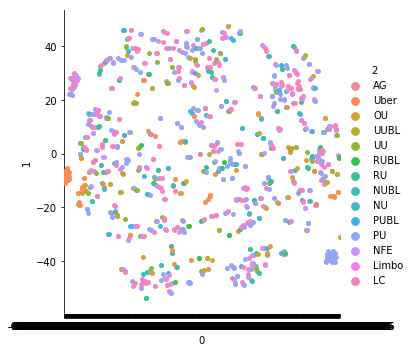

In [5]:
formats_vector = dataset.iloc[0:, -1].values
sns_df = pd.DataFrame(np.concatenate((X_tsne[:, 0:2], formats_vector.reshape((952, 1))), axis=1))
sns_df['Pokemon'] = dataset['Pokemon']
sns.catplot(x=0, y=1, data=sns_df, hue=2, hue_order=hue_order_list)

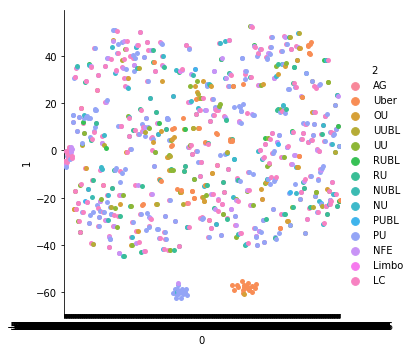

In [6]:
sns_df = pd.DataFrame(np.concatenate((X_tsne_post_svd[:, 0:2], formats_vector.reshape((952, 1))), axis=1))
sns.catplot(x=0, y=1, data=sns_df, hue=2, hue_order=hue_order_list)